<a href="https://colab.research.google.com/github/YashasMessi02/Machine-learning/blob/master/Regerssion_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Copyright © YashasMessi02*

#**Logistic Regression Model**
![Perceptron](https://github.com/msiddalingaiah/MachineLearning/raw/ec817d3a9e53c764181233e991732017db37d9a1/Regression/images/perceptron75.png)

The Inputs are the datasets that we use for creating a Regression Model. But most of the time the data sets we provide don't tend give the maximum accuracy that we expect. So our data needs some **manipulation** . And that's where the weights and biases come into picture. We usually multiply **weights** to the input datasets and finally a **Bias** is added to the datasets.

And once we are done with the manipulation part, we'll let the manipulated dataset pass through the *Non-Linear Function*. The *Non-Linear function* is some s-shaped function which we'll be using for classifying the data.

For example, assume that the numbers you have in your dataset are too large for your model to perform regression. In such cases, you can simply use some *Non-Linear function* like the **Sigmoid Function**(*which is popularly used for binary classification of data*) to make the numbers more meaningful for your regression model. And finally, you can now perform your regression.
This **Sigmoid function** is so important that it is also used in designing neural networks.

In [0]:
import matplotlib.pyplot as plt
import math 
from sklearn import datasets
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-99, 100)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

In [0]:
print(iris.DESCR) #Plz do read the description of the data before you actually start working on the dataset

In [0]:
iris= datasets.load_iris()
print(iris.data)


In [0]:
#Printing the categories of iris
print(iris.target_names)

#**Prediction Function**

This function takes one sample, multiplies by the weights, adds a bias, and passes the sum through a Sigmoid function. This function will be used to determine weights and biases during training as well as make predictions after training is complete.

In [0]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
  result = result + bias
  return sigmoid(result)


#**Loss And Cost Functions**

The loss function compares the predicted output with the expected output for a single training sample. If the absolute difference between the predicted and expected output is high, the loss should be high. The loss function here is a bit more complicated than a simple difference between predicted output and expected output, because it is known to make training easier.

$$\mathcal L(y, \hat y) = -(y \log \hat y + (1-y) \log (1 - \hat y))$$

Where $\mathcal L$ is the loss, $y$ is the training sample or ground truth, and $\hat y$ is the predicted value from the model.


In [0]:
def loss(y_train,yp):
  return -(y_train*math.log(yp)+((1-y_train)*math.log(1-yp)))

We can see how this function behaves for a fixed training value and a range of predicted values.

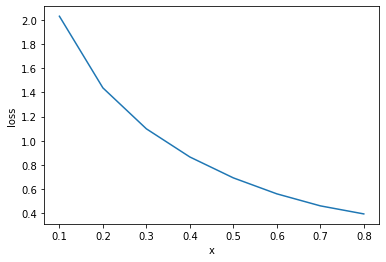

In [0]:
y_train=0.876
x=[i*0.1 for i in range(1,9)]
y=[loss(y_train,yp) for yp in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('loss')
plt.show()

The cost function is the average of the loss over all training samples:

$$\mathcal J = \frac{1}{m} \sum_{i=0}^{m} \mathcal L(y, \hat y)$$

#**Gradient Descent**

Gradient descent attempts to minimize the cost function by iteratively adjusting weights and biases in the direction of lower cost. This achieved by computing the derivative (gradient) or slope of the cost function for each of the weights and biases.

The general equations are

$$w_{k+1} = w_{k} - \alpha \frac{\partial \mathcal J}{\partial w}$$$$b_{k+1} = b_{k} - \alpha \frac{\partial \mathcal J}{\partial b}$$
Where $w_{k}$ and $b_{k}$ are the current values of weights and biases, and $w_{k+}$ and $b_{k+1}$ are the next values after one iteration. The number $\alpha$ is the learning rate, which is a tuning parameter or hyperparameter. If the learning rate is too small, it will take longer to train, whereas too large of a training value might result in wild oscillations that never converge on an optimum solution.

To picture how this works, let's consider an example in two dimensions:

$$y = x^2 + \frac{x}{2}$$

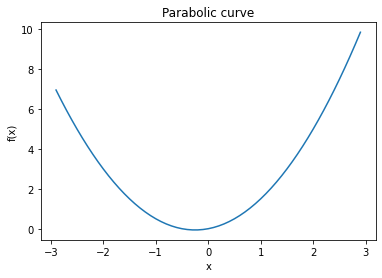

In [14]:
# First let's graph the above mentioned function y=f(x) and then use the Gradient Descent method.
# That function is clearly a parabola.
def parabola(x):
  return (x**2+(x/2.0))
xi=[0.1*i for i in range(-29,30)]
yi=[parabola(xk) for xk in xi]
plt.plot(xi,yi)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Parabolic curve")
plt.show()

The above curve exactly fits the curve 
$$ y= x^2 + \frac{x}{2} $$

The first derivative, or the slope at any point $x$ is:

$$\frac{\partial y}{\partial x} = 2x + 0.5$$
To find the minimum, iterate using this equation:

$$x_{k+1} = x_{k} - \alpha \frac{\partial y}{\partial x}$$

The $\alpha$ is known as the learning rate. Learning rate($\alpha$) is generally used for tuning our model.The best is our $\alpha$ the better would be the training process. Let's go to the code now.

Estimated minimum -0.17, -0.06
Derivative (gradient) 0.20


Text(0.5, 1.0, 'Simple function')

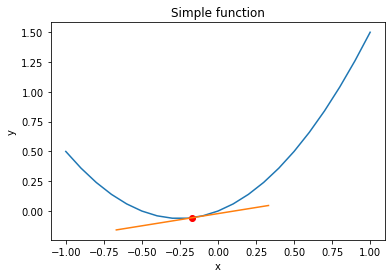

In [18]:
x_k = 0.0

learning_rate = 0.1

def derivative(x):
  return 2*x + 0.5

for i in range(5):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient

print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)

x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plt.plot(line_x, line_y)
plt.title('Simple function')